In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("/content/drive/MyDrive/Peshawar/Peshawar Circle Small drop.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("/content/drive/MyDrive/Peshawar/New Mardan test.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [5]:

# from keras.optimizers.optimizer_v2.adamax import Adamax
# from keras.optimizers.optimizer_v2 import adam

# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001, decay=0.0001 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=20)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=100, batch_size=128, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
157/157 - 2s - loss: 110174.1953 - val_loss: 31.2896 - 2s/epoch - 13ms/step
Epoch 2/200
157/157 - 1s - loss: 1.7697 - val_loss: 31.2549 - 709ms/epoch - 5ms/step
Epoch 3/200
157/157 - 1s - loss: 1.7655 - val_loss: 31.2321 - 636ms/epoch - 4ms/step
Epoch 4/200
157/157 - 1s - loss: 1.7616 - val_loss: 31.2192 - 698ms/epoch - 4ms/step
Epoch 5/200
157/157 - 1s - loss: 1.7576 - val_loss: 31.1277 - 655ms/epoch - 4ms/step
Epoch 6/200
157/157 - 1s - loss: 1.7505 - val_loss: 31.0998 - 653ms/epoch - 4ms/step
Epoch 7/200
157/157 - 1s - loss: 1.7456 - val_loss: 31.0480 - 712ms/epoch - 5ms/step
Epoch 8/200
157/157 - 1s - loss: 1.7411 - val_loss: 30.9329 - 654ms/epoch - 4ms/step
Epoch 9/200
157/157 - 1s - loss: 1.7320 - val_loss: 30.8441 - 668ms/epoch - 4ms/step
Epoch 10/200
157/157 - 1s - loss: 1.7220 - val_loss: 30.7571 - 649ms/epoch - 4ms/step
Epoch 11/200
157/157 - 1s - loss: 1.7208 - val_loss: 30.6963 - 684ms/epoch - 4ms/step
Epoch 12/200
157/157 - 1s - loss: 1.7107 - val_loss: 30.5419

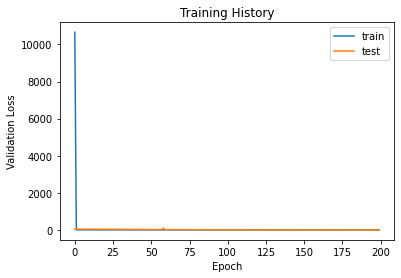

In [ ]:
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Validation Loss')
pyplot.show()

Training Set R-Square= 0.9362169501796104


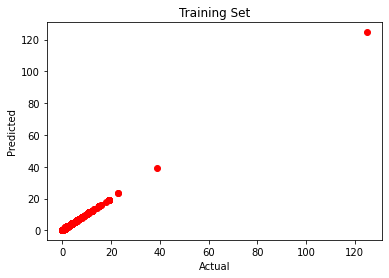

In [ ]:
# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

Validation Set R-Square= 0.9966254659272381


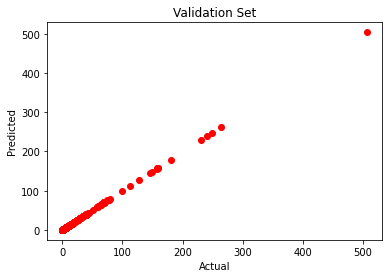

In [ ]:
# Plot actual vs prediction for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)